In [2]:
import re
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [6]:
# # Define a function to parse the text file and construct a DataFrame
# def parse_log_to_dataframe(file_path):
#     data = []
#     with open(file_path, 'r') as file:
#         epoch_data = {}
#         for line in file:
#             line = line.strip()
#             if line.startswith("Epoch") and "train errors" in line:
#                 if epoch_data:  # If epoch_data is not empty, save it
#                     data.append(epoch_data)
#                     epoch_data = {}
#                 epoch_data['Epoch'] = int(re.search(r"Epoch (\d+)", line).group(1))
#                 train_errors = eval(line.split(": ", 1)[1])
#                 for k, v in train_errors.items():
#                     epoch_data[f"Train_{k}"] = v
#             elif "validation errors" in line:
#                 validation_errors = eval(line.split(": ", 1)[1])
#                 for k, v in validation_errors.items():
#                     epoch_data[f"Validation_{k}"] = v
#             elif "test errors" in line:
#                 test_errors = eval(line.split(": ", 1)[1])
#                 for k, v in test_errors.items():
#                     epoch_data[f"Test_{k}"] = v
#             elif "current learning rate" in line:
#                 epoch_data['Learning_Rate'] = float(line.split("=")[-1].strip())
#         if epoch_data:  # Append the last epoch data
#             data.append(epoch_data)

#     # Create a DataFrame
#     df = pd.DataFrame(data)
#     return df

# # Specify the file path
# file_path = "early_exit_output.txt"

# # Generate the DataFrame
# df = parse_log_to_dataframe(file_path)

# # Display the first few rows of the DataFrame
# print(df.head())

# # Save the DataFrame to a CSV file if needed
# df.to_csv("parsed_data_early_exit.csv", index=False)


   Epoch  Train_Seg_Loss  Validation_Seg_Loss  Validation_Overall_Acc  \
0      0        0.646489             0.646500                0.461896   
1      1        0.643118             0.618884                0.578977   
2      2        0.634327             0.614396                0.594722   
3      3        0.631164             0.607827                0.627103   
4      4        0.628359             0.607445                0.628480   

   Validation_Mean_IOU  Validation_Class_0  Validation_Class_1  Test_Seg_Loss  \
0             0.243831            0.619335            0.071972       0.653170   
1             0.306479            0.725506            0.080617       0.629003   
2             0.314923            0.738609            0.081482       0.622498   
3             0.330752            0.764718            0.077699       0.616626   
4             0.331694            0.765825            0.078943       0.616801   

   Test_Overall_Acc  Test_Mean_IOU  Test_Class_0  Test_Class_1  Learning_R

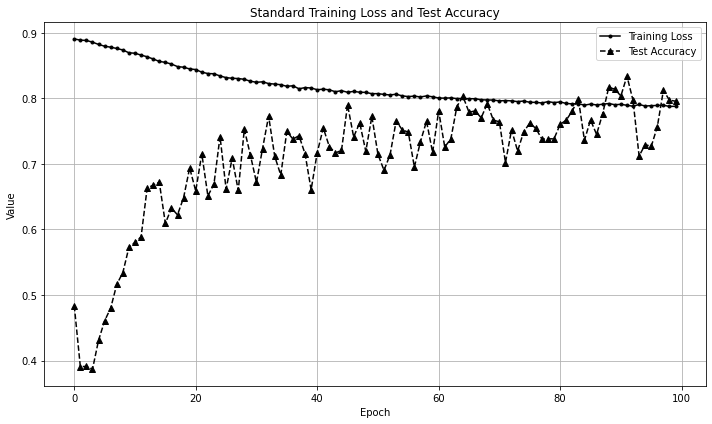

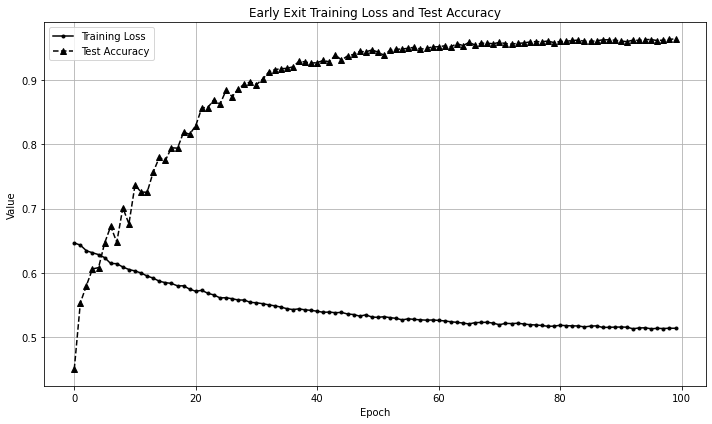

In [13]:
def plot_training_metrics(df, name):
    plt.figure(figsize=(10, 6))

    # Plotting Training Loss and Test Accuracy
    plt.plot(df['Epoch'], df['Train_Seg_Loss'], label='Training Loss', color='black', marker='.', linestyle='-')
    plt.plot(df['Epoch'], df['Test_Overall_Acc'], label='Test Accuracy', color='black', marker='^', linestyle='--')

    # Adding titles and labels
    plt.title(f'{name} Training Loss and Test Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.grid(True)
    plt.legend()
    
    # Saving the figure before showing
    plt.tight_layout()
    plt.savefig(f"{name}.png")
    plt.show()

# Load the datasets
df = pd.read_csv("parsed_data.csv")
df_ee = pd.read_csv("parsed_data_early_exit.csv")

# Call the function to plot
plot_training_metrics(df, "Standard")
plot_training_metrics(df_ee, "Early Exit")
